In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV





In [ ]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)

X_train shape:  (1800, 18)
X_test shape:  (200, 18)
y_train shape:  (1800, 2)


In [ ]:
X_train_new = X_train.drop(['artist', 'song'], axis = 1)
X_test_new = X_test.drop(['artist', 'song'], axis = 1)
X_train_new

,id,duration_ms,explicit,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,1873,221653,False,2018,0.777,0.779,0,-4.449,0,0.0972,0.05430,0.000000,0.6360,0.768,94.023,"pop, latin"
1,527,225533,False,2005,0.741,0.759,0,-5.096,0,0.1200,0.02180,0.000000,0.6280,0.362,97.084,"hip hop, pop, R&B"
2,174,231666,False,2000,0.550,0.804,2,-5.218,1,0.0271,0.01480,0.000043,0.1050,0.789,79.166,"rock, pop"
3,721,199853,False,2007,0.764,0.751,8,-3.740,1,0.0703,0.00554,0.000237,0.1640,0.418,91.977,"pop, R&B"
4,415,236520,False,2004,0.797,0.502,10,-3.925,0,0.0968,0.01540,0.000000,0.1000,0.385,106.997,"hip hop, pop"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1131,215693,False,2011,0.668,0.857,7,-2.944,0,0.0535,0.01910,0.000007,0.0385,0.748,131.959,"pop, Dance/Electronic"
1796,1295,251626,False,2012,0.658,0.677,5,-6.628,1,0.0393,0.24800,0.000000,0.3680,0.248,124.910,"pop, R&B"
1797,861,204733,False,2008,0.715,0.665,4,-7.736,0,0.0502,0.09960,0.000000,0.2240,0.840,78.502,"pop, R&B"
1798,1460,199386,False,2014,0.706,0.786,0,-3.417,0,0.0910,0.26000,0.000000,0.3800,0.751,150.028,"hip hop, pop"


In [ ]:
#convert the column explicit to binary
X_train_new['explicit'] = X_train_new['explicit'].astype(int)
X_test_new['explicit'] = X_test_new['explicit'].astype(int)

In [ ]:
#use label encoding to convert the column 'genre' to numerical values
labelencoder = LabelEncoder()
X_train_new['genre'] = labelencoder.fit_transform(X_train_new['genre'])
X_test_new['genre'] = labelencoder.fit_transform(X_test_new['genre'])

In [ ]:
X_train_new.drop(['id'], axis = 1, inplace = True)
X_test_new.drop(['id'], axis = 1, inplace = True)
y_train_new = y_train.drop(['id'], axis = 1)



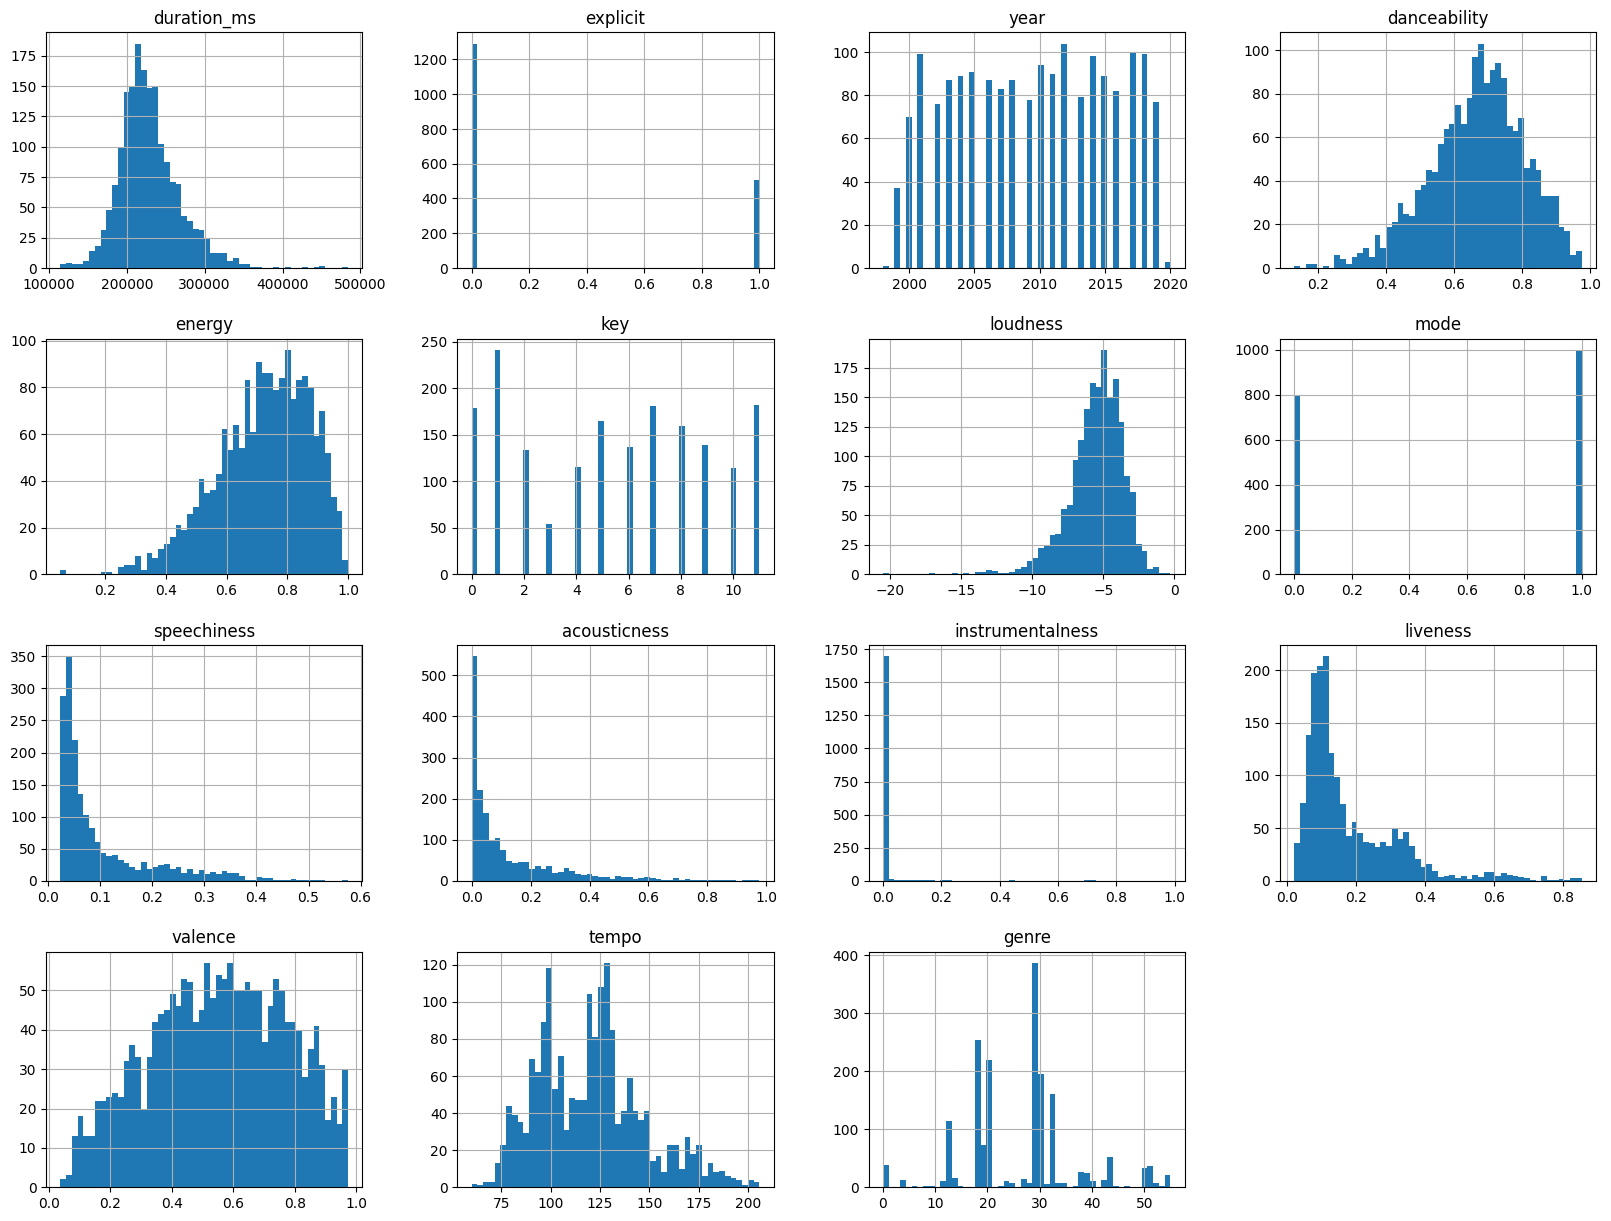

In [ ]:
# visualizing all the numeric features
X_train_new.hist(bins=50, figsize=(20,15))
plt.show()


In [ ]:
X_train_new.drop(['liveness'], axis = 1, inplace = True)
X_test_new.drop(['liveness'], axis = 1, inplace = True)
X_train_new.drop(['speechiness'], axis = 1, inplace = True)
X_test_new.drop(['speechiness'], axis = 1, inplace = True)
X_train_new.drop(['acousticness'], axis = 1, inplace = True)
X_test_new.drop(['acousticness'], axis = 1, inplace = True)

In [ ]:
X_train_new.drop(["instrumentalness"], axis = 1, inplace = True)
X_test_new.drop(["instrumentalness"], axis = 1, inplace = True)


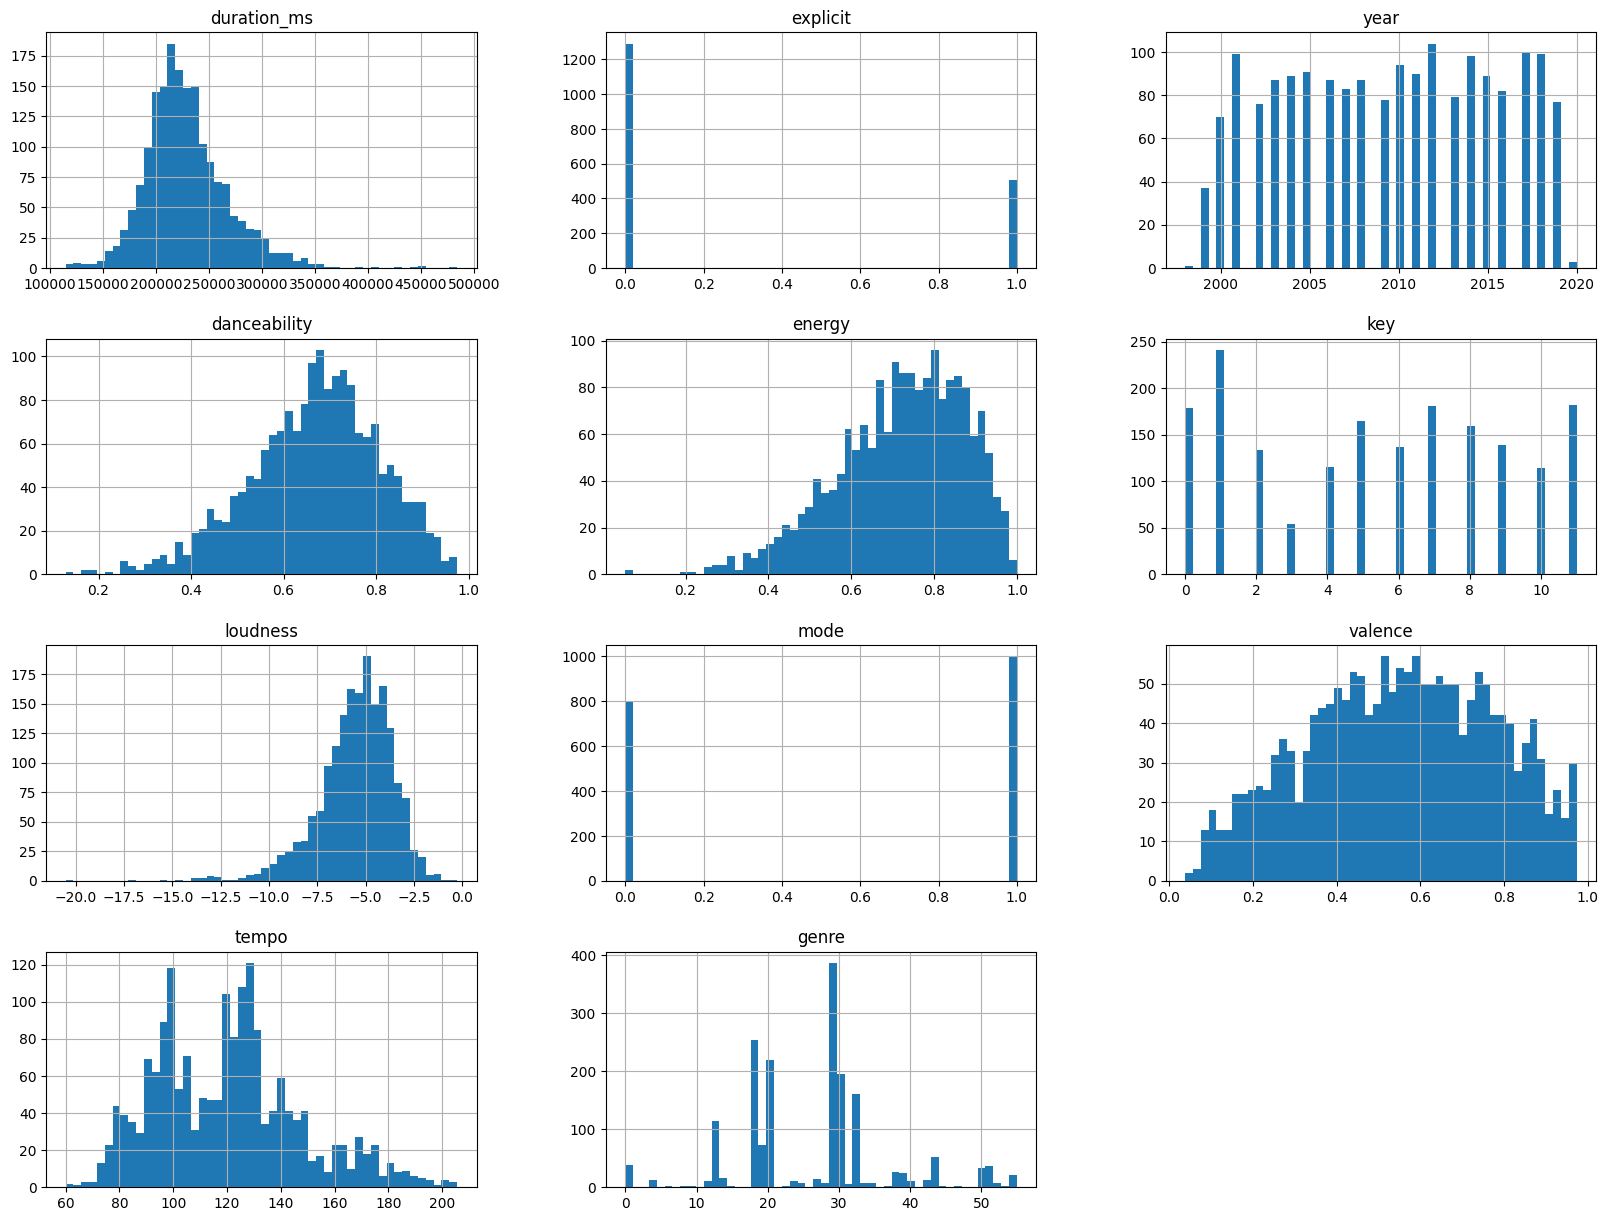

In [ ]:
X_train_new.hist(bins=50, figsize=(20,15))
plt.show()


              duration_ms  explicit      year  danceability    energy  \
duration_ms      1.000000  0.128238 -0.314834     -0.067744 -0.075348   
explicit         0.128238  1.000000  0.070931      0.249397 -0.162491   
year            -0.314834  0.070931  1.000000      0.046280 -0.101849   
danceability    -0.067744  0.249397  0.046280      1.000000 -0.102072   
energy          -0.075348 -0.162491 -0.101849     -0.102072  1.000000   
key             -0.004510 -0.004911  0.004556      0.040817 -0.002127   
loudness        -0.080157 -0.085000  0.024726     -0.035297  0.647553   
mode            -0.000353  0.049129  0.005291     -0.070548 -0.044396   
valence         -0.107772 -0.039698 -0.209303      0.404287  0.329991   
tempo           -0.024470  0.005143  0.081776     -0.182384  0.152217   
genre           -0.093882 -0.369047 -0.084620     -0.259896  0.123394   

                   key  loudness      mode   valence     tempo     genre  
duration_ms  -0.004510 -0.080157 -0.000353 -0.10

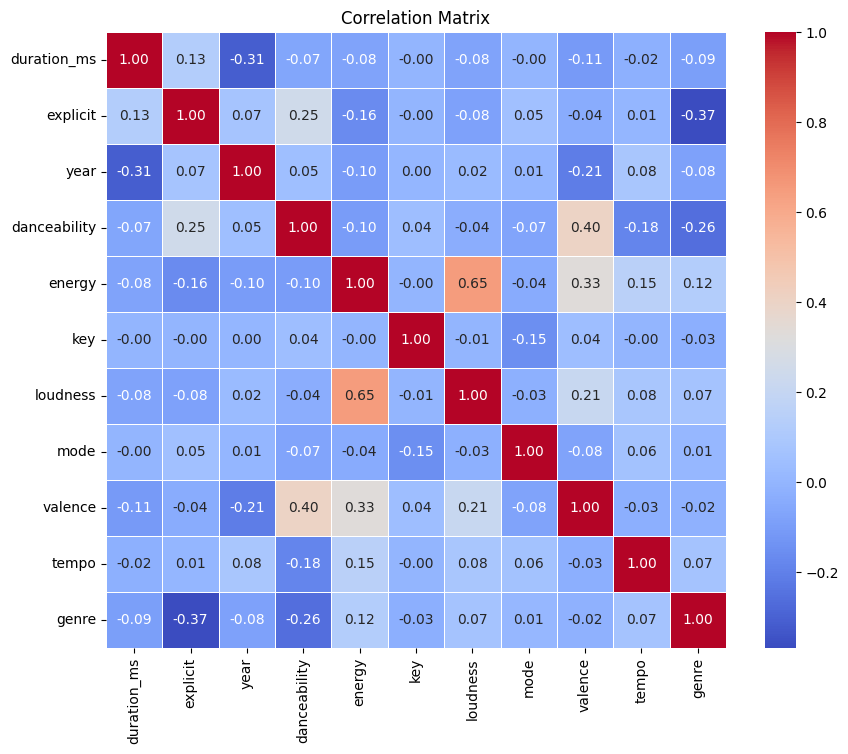

In [ ]:
#correlation matrix
corr_matrix = X_train_new.corr()
print(corr_matrix)

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Concatenate features and target variable
df_concatenated = pd.concat([X_train_new, y_train_new], axis=1)

# Compute correlation matrix
correlation_matrix = df_concatenated.corr()

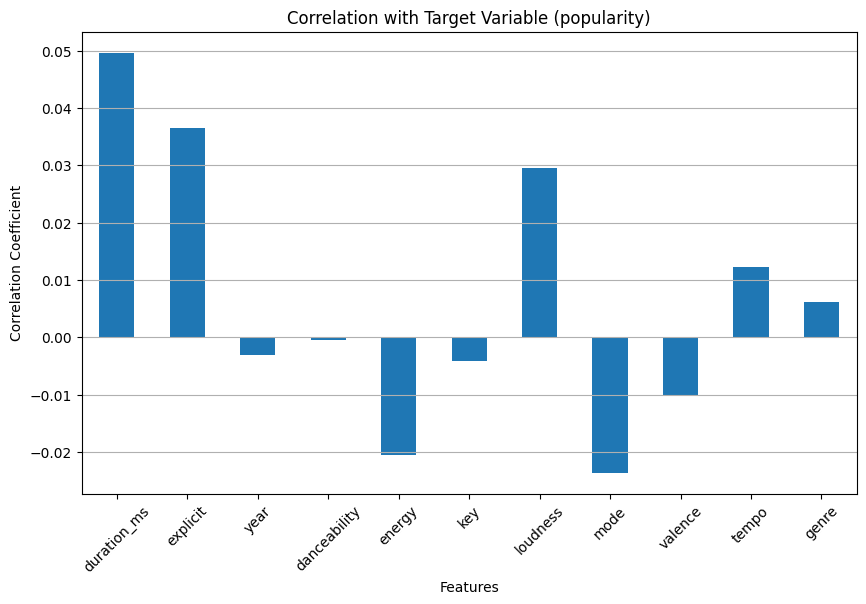

In [ ]:
# Plot correlation coefficients with the target variable
plt.figure(figsize=(10, 6))
correlation_matrix['popularity'].drop('popularity').plot(kind='bar')
plt.title('Correlation with Target Variable (popularity)')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
X_train_new.drop(["danceability"], axis = 1, inplace = True)
X_test_new.drop(["danceability"], axis = 1, inplace = True)


In [ ]:
#scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_new)
X_test_scaled = scaler.fit_transform(X_test_new)

In [ ]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train_new, y_train_new, test_size = 0.2, random_state = 0)


In [ ]:
#fit the model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_new, y_train_new)
y_pred_rf = rf.predict(X_val)
mse =mean_squared_error(y_val, y_pred_rf)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

<ipython-input-83-c14c89dc2618>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_new, y_train_new)


Root Mean Squared Error:  9.279280533235884


In [ ]:
#improve the model performance
rf = RandomForestRegressor(n_estimators=100, max_depth = 100, random_state = 0)
rf.fit(X_train_new, y_train_new)
y_pred_rf = rf.predict(X_val)
mse =mean_squared_error(y_val, y_pred_rf)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)


<ipython-input-90-236fdbca2686>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_new, y_train_new)


Root Mean Squared Error:  9.129371166054462


In [ ]:
#predict the test data
y_pred_rf = rf.predict(X_test_new)
y_pred_rf
#load the sample submission file
sample_submission = pd.read_csv('sub.csv')

sample_submission['popularity'] = y_pred_rf


sample_submission.to_csv('submission8.csv', index = False)

In [ ]:
#use gridSearch for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'max_features': ['sqrt', 'auto', 'log2'], # the number of features to consider at each split
    'min_samples_split': [2, 5, 10], # the minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4], # the minimum number of samples required to be at a leaf node
    'bootstrap': [True, False], # whether to use bootstrap samples when building trees
    'criterion': ['absolute_error', 'poisson', 'squared_error'],
}


In [ ]:
# # Create a based model
# rf = RandomForestRegressor()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
#                           cv = 3, n_jobs = -1, verbose = 2)
# grid_search.fit(X_train_new, y_train_new)
# grid_search.best_params_


In [ ]:
#fit the model of the best parameters
rf_best = RandomForestRegressor(n_estimators = 100, max_depth = 10, max_features = 'sqrt', min_samples_split = 2, min_samples_leaf = 2, bootstrap = True, criterion = 'squared_error')
rf_best.fit(X_train_new, y_train_new)
y_pred_rf = rf_best.predict(X_val)
mse =mean_squared_error(y_val, y_pred_rf)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)


<ipython-input-120-c46cf335d4af>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_best.fit(X_train_new, y_train_new)


Root Mean Squared Error:  18.275601922952674


In [ ]:
#predict the test data
y_pred_rf = rf_best.predict(X_test_new)
y_pred_rf
#load the sample submission file
sample_submission = pd.read_csv('sub.csv')

sample_submission['popularity'] = y_pred_rf


sample_submission.to_csv('submission7.csv', index = False)